# Analyse of several football Leagues







I'm keen on sports, and i really like footbal. That is why I decided to choose this dataset. This dataset i took from kaggle. There're many files, but i will open only those which i need.

#Import libraries and datasets

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import plotly.express as px
from datetime import datetime
from matplotlib import offsetbox
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

In [2]:
df_games = pd.read_csv('games.csv')
df_players = pd.read_csv('players.csv')
df_clubs = pd.read_csv('clubs.csv')
club_games = pd.read_csv("club_games.csv")

# Simpliest dataframes and plots




Unpacking datasets with information about players of
the current year

In [3]:
df_current_players = df_players.loc[df_players['last_season'] == 2023]
df_current_players

,player_id,first_name,last_name,name,last_season,current_club_id,player_code,country_of_birth,city_of_birth,country_of_citizenship,...,foot,height_in_cm,market_value_in_eur,highest_market_value_in_eur,contract_expiration_date,agent_name,image_url,url,current_club_domestic_competition_id,current_club_name
89,22860,Jesper,Hansen,Jesper Hansen,2023,678,jesper-hansen,Denmark,Slangerup,Denmark,...,right,188.0,200000.0,1000000.0,2024-06-30 00:00:00,Boutique Transfers,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/jesper-hansen/...,DK1,Aarhus GF
118,30321,Óscar,Trejo,Óscar Trejo,2023,367,oscar-trejo,Argentina,Santiago del Estero,Argentina,...,right,180.0,2500000.0,4000000.0,2024-06-30 00:00:00,Eleven Talent Group,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/oscar-trejo/pr...,ES1,Rayo Vallecano
153,38780,Vítor,Gomes,Vítor Gomes,2023,2425,vitor-gomes,Portugal,Vila do Conde,Portugal,...,right,182.0,100000.0,1500000.0,2024-06-30 00:00:00,Gestifute,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/vitor-gomes/pr...,PO1,Rio Ave FC
162,40204,Joe,Hart,Joe Hart,2023,371,joe-hart,England,Shrewsbury,England,...,right,196.0,1500000.0,24000000.0,2024-05-31 00:00:00,OmniSports,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/joe-hart/profi...,SC1,Celtic FC
176,43250,Jan,Vertonghen,Jan Vertonghen,2023,58,jan-vertonghen,Belgium,Sint-Niklaas,Belgium,...,left,189.0,1500000.0,32000000.0,2024-06-30 00:00:00,A-GROUP,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/jan-vertonghen...,BE1,RSC Anderlecht
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30292,1025424,Solomon,Agbalaka,Solomon Agbalaka,2023,41231,solomon-agbalaka,NaN,NaN,Nigeria,...,left,185.0,150000.0,150000.0,2024-06-30 00:00:00,GTM,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/solomon-agbala...,RU1,FC Sochi
30294,284732,Ramy,Bensebaini,Ramy Bensebaini,2023,16,ramy-bensebaini,Algeria,Constantine,Algeria,...,left,187.0,20000000.0,22000000.0,2027-06-30 00:00:00,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/ramy-bensebain...,L1,Borussia Dortmund
30297,371851,Jaka,Bijol,Jaka Bijol,2023,410,jaka-bijol,Slovenia,Vuzenica,Slovenia,...,right,190.0,10000000.0,10000000.0,2027-06-30 00:00:00,MSC GROUP,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/jaka-bijol/pro...,IT1,Udinese Calcio
30299,586756,Festy,Ebosele,Festy Ebosele,2023,410,festy-ebosele,Ireland,"Enniscorthy, Wexford",Ireland,...,right,180.0,4500000.0,4500000.0,2027-06-30 00:00:00,The Kulture Group,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/festy-ebosele/...,IT1,Udinese Calcio


-----------------
Here we are applying League, it will be toUpperCase() in html.

In [4]:
liga = input()

RU1


In [5]:
df_current_league_players = df_current_players.loc[df_current_players['current_club_domestic_competition_id'] == f'{liga}']

In [6]:
df_current_league_players.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 419 entries, 259 to 30292
Data columns (total 23 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   player_id                             419 non-null    int64  
 1   first_name                            399 non-null    object 
 2   last_name                             419 non-null    object 
 3   name                                  419 non-null    object 
 4   last_season                           419 non-null    int64  
 5   current_club_id                       419 non-null    int64  
 6   player_code                           419 non-null    object 
 7   country_of_birth                      398 non-null    object 
 8   city_of_birth                         398 non-null    object 
 9   country_of_citizenship                419 non-null    object 
 10  date_of_birth                         419 non-null    object 
 11  sub_position   

As can be seen 👆👆👆  we shouldn't delete any rows, because missed raws aren't essential, that won't be needed in further investigation






  
   
    
    



---


**This is for making a new column - age**

With using datetime for constant updating of the information

In [ ]:
df_current_league_players['date_of_birth'] = pd.to_datetime(df_current_league_players['date_of_birth'])

current_year = datetime.now().year

df_current_league_players['age'] = current_year - df_current_league_players['date_of_birth'].dt.year

In [8]:
df_current_league_players['age']

259      33
331      31
341      32
822      30
914      25
         ..
30087    31
30178    28
30246    27
30287    21
30292    20
Name: age, Length: 419, dtype: int64

I've done it 😎

---
It's very uncomfortable for understending transfer value, so I wanna represent it in M€

In [ ]:
df_current_league_players['market_value_in_eur'] = df_current_league_players['market_value_in_eur'].div(1000000).round(10)

---

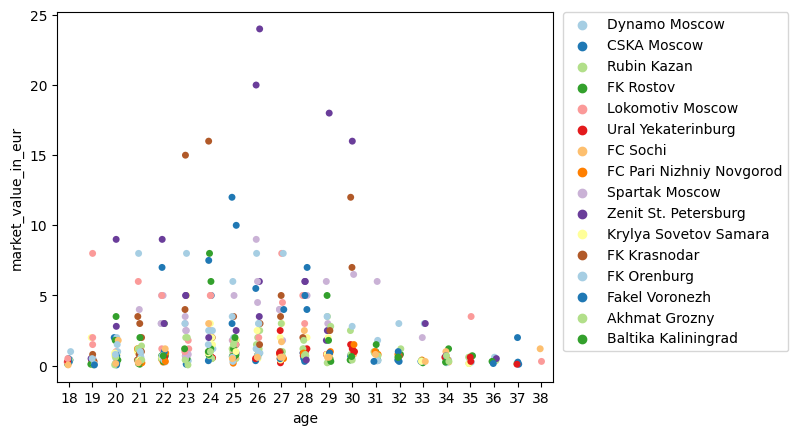

In [10]:
sns.stripplot(df_current_league_players, x='age', y='market_value_in_eur',
                  hue='current_club_name', palette='Paired')

plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

[Text(0.5, 1.0, 'Relation between transfer value and age in RU1')]

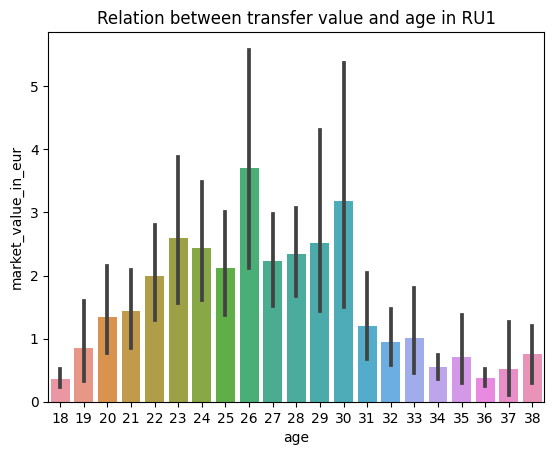

In [11]:
sns.barplot(df_current_league_players, x='age', y='market_value_in_eur').set(title=f'Relation between transfer value and age in {liga}')

It's just an interesting fact (I can create plots)

This barplot shows us average transfer value by age

------------
Here I create a new table with total transfer value of the each team

In [12]:
league_overview = df_current_league_players.pivot_table(index='current_club_name',  values=['market_value_in_eur'], aggfunc=sum).sort_values(by='market_value_in_eur', ascending=False)
league_overview_1 = league_overview.reset_index('current_club_name')
league_overview_1

,current_club_name,market_value_in_eur
0,Zenit St. Petersburg,153.100
1,Spartak Moscow,96.100
2,FK Krasnodar,90.500
3,CSKA Moscow,82.100
4,Dynamo Moscow,77.500
5,Lokomotiv Moscow,76.550
6,FK Rostov,46.600
7,Krylya Sovetov Samara,37.550
8,Akhmat Grozny,30.450
9,Rubin Kazan,25.200


**Data visualisation of this table
👀:**

In [13]:
fig = px.bar(league_overview_1, x='current_club_name', y='market_value_in_eur',
             title=f'Total Market Value of {liga}',
             color='market_value_in_eur'
            )
fig.update_xaxes(categoryorder='total descending', tickangle=-45)

I unpacking a new dataset with **in-season** matches. Also I immediately applying current year

In [14]:
real_matchdays = df_games[(df_games["round"].str.contains("Matchday"))]
real_matchdays

,game_id,competition_id,season,round,date,home_club_id,away_club_id,home_club_goals,away_club_goals,home_club_position,...,stadium,attendance,referee,url,home_club_formation,away_club_formation,home_club_name,away_club_name,aggregate,competition_type
0,2222597,RU1,2012,6. Matchday,2012-08-25,3725,232,2,1,2.0,...,Akhmat-Arena,21700.0,Vladislav Bezborodov,https://www.transfermarkt.co.uk/terek-grozny_s...,NaN,NaN,Akhmat Grozny,Spartak Moscow,2:1,domestic_league
1,2222627,RU1,2012,5. Matchday,2012-08-20,2696,4128,0,2,11.0,...,Metallurg,11400.0,Sergey Ivanov,https://www.transfermarkt.co.uk/krylya-sovetov...,NaN,NaN,Krylya Sovetov Samara,Amkar Perm,0:2,domestic_league
2,2222658,RU1,2012,10. Matchday,2012-09-30,2410,121,0,2,2.0,...,Arena Khimki,12000.0,Sergey Karasev,https://www.transfermarkt.co.uk/cska-moscow_di...,NaN,NaN,CSKA Moscow,Dynamo Moscow,0:2,domestic_league
3,2222664,RU1,2012,8. Matchday,2012-09-15,932,2698,1,0,5.0,...,RZD Arena,11408.0,Sergey Karasev,https://www.transfermarkt.co.uk/lokomotiv-mosc...,NaN,NaN,Lokomotiv Moscow,Rubin Kazan,1:0,domestic_league
4,2222683,RU1,2012,12. Matchday,2012-10-22,2696,12438,0,1,11.0,...,Metallurg,7534.0,Timur Arslanbekov,https://www.transfermarkt.co.uk/krylya-sovetov...,NaN,NaN,Krylya Sovetov Samara,Volga Nizhniy Novgorod (- 2016),0:1,domestic_league
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64973,3852607,NL1,2022,12. Matchday,2022-10-30,383,467,3,0,2.0,...,Philips Stadion,31007.0,Martin van den Kerkhof,https://www.transfermarkt.co.uk/psv-eindhoven_...,NaN,NaN,PSV Eindhoven,NEC Nijmegen,3:0,domestic_league
64974,2589097,NL1,2015,23. Matchday,2016-02-14,467,383,0,3,8.0,...,Goffertstadion,12353.0,Kevin Blom,https://www.transfermarkt.co.uk/nec-nijmegen_p...,NaN,NaN,NEC Nijmegen,PSV Eindhoven,0:3,domestic_league
64975,2700827,NL1,2016,23. Matchday,2017-02-18,383,467,3,1,3.0,...,Philips Stadion,33500.0,Jochem Kamphuis,https://www.transfermarkt.co.uk/psv-eindhoven_...,NaN,NaN,PSV Eindhoven,NEC Nijmegen,3:1,domestic_league
64976,3852741,NL1,2022,27. Matchday,2023-04-01,467,383,2,4,10.0,...,Goffertstadion,12500.0,Edwin van de Graaf,https://www.transfermarkt.co.uk/nec-nijmegen_p...,NaN,NaN,NEC Nijmegen,PSV Eindhoven,2:4,domestic_league


Believe I can dropna(), but there is no need in it. This table will be used only for merging one column)

In [15]:
RPL_matchdays = real_matchdays[real_matchdays['competition_id'] == 'RU1']
RPL_matchdays

,game_id,competition_id,season,round,date,home_club_id,away_club_id,home_club_goals,away_club_goals,home_club_position,...,stadium,attendance,referee,url,home_club_formation,away_club_formation,home_club_name,away_club_name,aggregate,competition_type
0,2222597,RU1,2012,6. Matchday,2012-08-25,3725,232,2,1,2.0,...,Akhmat-Arena,21700.0,Vladislav Bezborodov,https://www.transfermarkt.co.uk/terek-grozny_s...,NaN,NaN,Akhmat Grozny,Spartak Moscow,2:1,domestic_league
1,2222627,RU1,2012,5. Matchday,2012-08-20,2696,4128,0,2,11.0,...,Metallurg,11400.0,Sergey Ivanov,https://www.transfermarkt.co.uk/krylya-sovetov...,NaN,NaN,Krylya Sovetov Samara,Amkar Perm,0:2,domestic_league
2,2222658,RU1,2012,10. Matchday,2012-09-30,2410,121,0,2,2.0,...,Arena Khimki,12000.0,Sergey Karasev,https://www.transfermarkt.co.uk/cska-moscow_di...,NaN,NaN,CSKA Moscow,Dynamo Moscow,0:2,domestic_league
3,2222664,RU1,2012,8. Matchday,2012-09-15,932,2698,1,0,5.0,...,RZD Arena,11408.0,Sergey Karasev,https://www.transfermarkt.co.uk/lokomotiv-mosc...,NaN,NaN,Lokomotiv Moscow,Rubin Kazan,1:0,domestic_league
4,2222683,RU1,2012,12. Matchday,2012-10-22,2696,12438,0,1,11.0,...,Metallurg,7534.0,Timur Arslanbekov,https://www.transfermarkt.co.uk/krylya-sovetov...,NaN,NaN,Krylya Sovetov Samara,Volga Nizhniy Novgorod (- 2016),0:1,domestic_league
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62805,4191142,RU1,2023,11. Matchday,2023-10-08,232,2410,2,2,8.0,...,Otkrytie Bank Arena,25245.0,Kirill Levnikov,https://www.transfermarkt.co.uk/spartak-moscow...,4-3-3 Attacking,3-4-2-1,Spartak Moscow,CSKA Moscow,2:2,domestic_league
62807,4216896,RU1,2023,15. Matchday,2023-11-11,1124,2410,1,1,10.0,...,Central Stadium of Profsoyuzes,13447.0,Aleksey Sukhoy,https://www.transfermarkt.co.uk/fakel-voronezh...,4-4-2 double 6,3-4-2-1,Fakel Voronezh,CSKA Moscow,1:1,domestic_league
62808,4216901,RU1,2023,15. Matchday,2023-11-12,41231,2698,0,2,16.0,...,Fisht Olympic Stadium,2992.0,Sergey Tsyganok,https://www.transfermarkt.co.uk/fc-sochi_rubin...,3-4-3,3-4-3,FC Sochi,Rubin Kazan,0:2,domestic_league
62825,3602636,RU1,2021,29. Matchday,2022-05-14,28095,3729,2,1,15.0,...,Neftyanik,6077.0,Vitali Meshkov,https://www.transfermarkt.co.uk/fk-ufa_arsenal...,NaN,NaN,FK Ufa,Arsenal Tula,2:1,domestic_league


-------------------


# Creating standings

-------------------
My hipothesis is: **The higher the transfer value of team, the better the result**

Unfortunately, we haven't standings. That is why I have to do it.





**1.**   If teams scored equal amount of goals, than this is a draw. If it is, apply for that match 2 (because 0-lose, 1-win).


In [16]:
club_games.loc[club_games['own_goals'] == club_games['opponent_goals'], 'is_win'] = 2

club_games = club_games[["game_id", "club_id", "is_win"]]
club_games

,game_id,club_id,is_win
0,2221751,431,0
1,2221755,83,1
2,2222597,3725,1
3,2222627,2696,0
4,2222658,2410,0
...,...,...,...
130043,4216901,2698,1
130044,4219018,1060,0
130045,4138029,238,1
130046,4204022,2497,1


**2.** We should create a column 'season'

In [17]:
club_games = pd.merge( club_games, real_matchdays[['game_id', 'season']])
club_games

,game_id,club_id,is_win,season
0,2222597,3725,1,2012
1,2222597,232,0,2012
2,2222627,2696,0,2012
3,2222627,4128,1,2012
4,2222658,2410,0,2012
...,...,...,...,...
91295,4216896,2410,2,2023
91296,4150611,1091,1,2023
91297,4150611,6676,0,2023
91298,4216901,41231,0,2023


**3.** Write a function which will convert values for win/lose/draw to points

In [18]:
def calculate_points(is_win):
    if is_win == 0:
        return 0
    elif is_win == 1:
        return 3
    elif is_win == 2:
        return 1
    else:
        return None

In [19]:
club_games['points'] = club_games['is_win'].apply(calculate_points)
club_games

,game_id,club_id,is_win,season,points
0,2222597,3725,1,2012,3
1,2222597,232,0,2012,0
2,2222627,2696,0,2012,0
3,2222627,4128,1,2012,3
4,2222658,2410,0,2012,0
...,...,...,...,...,...
91295,4216896,2410,2,2023,1
91296,4150611,1091,1,2023,3
91297,4150611,6676,0,2023,0
91298,4216901,41231,0,2023,0


**4.** Sum all the points by teams

In [20]:
club_seasons = club_games.groupby(["club_id", "season"], as_index=False)[['points']].sum()
club_seasons = club_seasons.loc[club_seasons['season'] == 2023]
club_seasons

,club_id,season,points
8,3,2023,6
23,5,2023,23
38,11,2023,27
50,12,2023,18
62,13,2023,28
...,...,...,...
2846,55686,2023,15
2851,60551,2023,30
2856,60949,2023,6
2860,61825,2023,6


**5.** Club_id -> club name

In [21]:
club_seasons = pd.merge(df_clubs[['club_id', 'name']], club_seasons)
club_seasons

,club_id,name,season,points
0,105,SV Darmstadt 98,2023,8
1,11127,Ural Yekaterinburg,2023,16
2,114,Besiktas JK,2023,22
3,12,AS Roma,2023,18
4,148,Tottenham Hotspur,2023,26
...,...,...,...,...
233,533,TSG 1899 Hoffenheim,2023,19
234,58,RSC Anderlecht,2023,28
235,724,FC Volendam,2023,8
236,800,Atalanta BC,2023,20


---
Create a new table with columns, which are satisfied for my investigation.

In [22]:
league_standings = club_seasons.pivot_table(index = 'name', values = 'points').sort_values(by = "points", ascending=False)
league_standings

,points
name,
PSV Eindhoven,36
Celtic FC,35
Girona FC,34
Royale Union Saint-Gilloise,34
Real Madrid,32
...,...
Sheffield United,5
US Salernitana 1919,5
Burnley FC,4


Add column of market value, make correct index.

In [23]:
all_data = pd.merge(league_standings, league_overview, left_index=True,right_index=True)
all_data= all_data.reset_index(names='name')
index_labels = (a for a in range(1, len(league_overview_1['current_club_name'])+1))
all_data.index = index_labels
all_data

,name,points,market_value_in_eur
1,FK Krasnodar,32,90.500
2,Zenit St. Petersburg,30,153.100
3,Dynamo Moscow,25,77.500
4,CSKA Moscow,25,82.100
5,Krylya Sovetov Samara,25,37.550
6,Lokomotiv Moscow,24,76.550
7,Spartak Moscow,24,96.100
8,Rubin Kazan,22,25.200
9,FC Pari Nizhniy Novgorod,21,16.225
10,Fakel Voronezh,19,11.000


This is a kludge which will help me to create nice scatterplot

In [24]:
all_data1 = all_data
index_labels = (a for a in range(len(league_overview_1['current_club_name']), 0, -1))
all_data1.index = index_labels

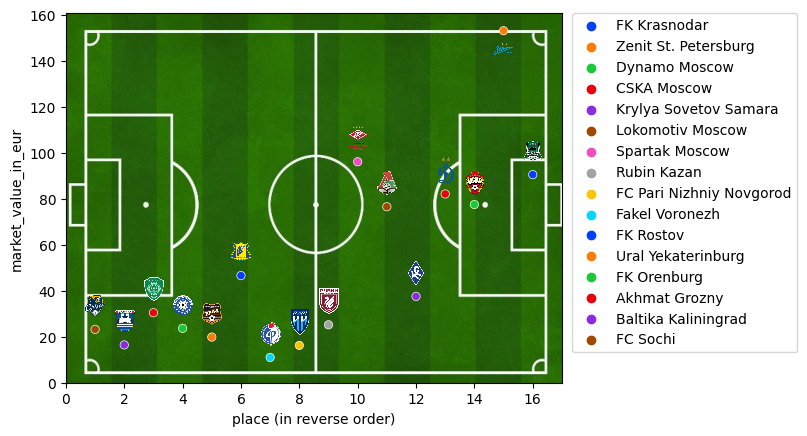

In [25]:
img = plt.imread('Lines_On_A_Football_Pitch.jpg')
fig, ax  = plt.subplots()
ax.imshow(img, extent=[0, len(league_overview_1['current_club_name']) + 1, 0, max(all_data['market_value_in_eur'])+(max(all_data['market_value_in_eur']) * 0.05)], aspect='auto', zorder=-1)
sns.scatterplot(data=all_data, x=all_data.index, y='market_value_in_eur',
                  hue='name', palette= 'bright'
            )
plt.xlabel('place (in reverse order)')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

if liga == 'RU1':
  imagebox = offsetbox.OffsetImage(plt.imread('Sochi.png'), zoom=0.1)
  ab = offsetbox.AnnotationBbox(imagebox, (1, 33.200), frameon=False)
  ax.add_artist(ab)

  imagebox = offsetbox.OffsetImage(plt.imread('akhmat.png'), zoom=0.1)
  ab = offsetbox.AnnotationBbox(imagebox, (3, 40.450), frameon=False)
  ax.add_artist(ab)

  imagebox = offsetbox.OffsetImage(plt.imread('Baltika.png'), zoom=0.1)
  ab = offsetbox.AnnotationBbox(imagebox, (2, 26.450), frameon=False)
  ax.add_artist(ab)

  imagebox = offsetbox.OffsetImage(plt.imread('Orenburg.png'), zoom=0.1)
  ab = offsetbox.AnnotationBbox(imagebox, (4, 33.650), frameon=False)
  ax.add_artist(ab)

  imagebox = offsetbox.OffsetImage(plt.imread('Ural.png'), zoom=0.1)
  ab = offsetbox.AnnotationBbox(imagebox, (5, 29.850), frameon=False)
  ax.add_artist(ab)

  imagebox = offsetbox.OffsetImage(plt.imread('Rostov.png'), zoom=0.1)
  ab = offsetbox.AnnotationBbox(imagebox, (6, 56.600), frameon=False)
  ax.add_artist(ab)

  imagebox = offsetbox.OffsetImage(plt.imread('Fakel.png'), zoom=0.1)
  ab = offsetbox.AnnotationBbox(imagebox, (7, 21.000), frameon=False)
  ax.add_artist(ab)

  imagebox = offsetbox.OffsetImage(plt.imread('NN.png'), zoom=0.1)
  ab = offsetbox.AnnotationBbox(imagebox, (8, 26.225), frameon=False)
  ax.add_artist(ab)

  imagebox = offsetbox.OffsetImage(plt.imread('Rubin.png'), zoom=0.1)
  ab = offsetbox.AnnotationBbox(imagebox, (9, 35.200), frameon=False)
  ax.add_artist(ab)

  imagebox = offsetbox.OffsetImage(plt.imread('Spartak.png'), zoom=0.1)
  ab = offsetbox.AnnotationBbox(imagebox, (10, 106.100), frameon=False)
  ax.add_artist(ab)

  imagebox = offsetbox.OffsetImage(plt.imread('Loko.png'), zoom=0.1)
  ab = offsetbox.AnnotationBbox(imagebox, (11, 86.550), frameon=False)
  ax.add_artist(ab)

  imagebox = offsetbox.OffsetImage(plt.imread('KK.png'), zoom=0.1)
  ab = offsetbox.AnnotationBbox(imagebox, (12, 47.550), frameon=False)
  ax.add_artist(ab)

  imagebox = offsetbox.OffsetImage(plt.imread('Dinamo.png'), zoom=0.1)
  ab = offsetbox.AnnotationBbox(imagebox, (13, 92.500), frameon=False)
  ax.add_artist(ab)

  imagebox = offsetbox.OffsetImage(plt.imread('CSKA.png'), zoom=0.1)
  ab = offsetbox.AnnotationBbox(imagebox, (14, 87.100), frameon=False)
  ax.add_artist(ab)

  imagebox = offsetbox.OffsetImage(plt.imread('zenit.png'), zoom=0.1)
  ab = offsetbox.AnnotationBbox(imagebox, (15, 145.100), frameon=False)
  ax.add_artist(ab)

  imagebox = offsetbox.OffsetImage(plt.imread('Krasnodar.png'), zoom=0.1)
  ab = offsetbox.AnnotationBbox(imagebox, (16, 100.500), frameon=False)
  ax.add_artist(ab)

---
Open new file to merge cool data

In [26]:
league = df_clubs.loc[df_clubs['domestic_competition_id'] == f'{liga}']
current_league = league.loc[league['last_season'] == 2023]
current_league

,club_id,club_code,name,domestic_competition_id,total_market_value,squad_size,average_age,foreigners_number,foreigners_percentage,national_team_players,stadium_name,stadium_seats,net_transfer_record,coach_name,last_season,url
1,11127,ural-ekaterinburg,Ural Yekaterinburg,RU1,NaN,25,28.2,13,52.0,5,Yekaterinburg Arena,23000,€-770k,NaN,2023,https://www.transfermarkt.co.uk/ural-ekaterinb...
48,41231,fk-sochi,FC Sochi,RU1,NaN,27,26.9,11,40.7,2,Fisht Olympic Stadium,45994,+€3.05m,NaN,2023,https://www.transfermarkt.co.uk/fk-sochi/start...
58,932,lokomotiv-moskau,Lokomotiv Moscow,RU1,NaN,27,24.5,3,11.1,9,RZD Arena,27084,+€3.48m,NaN,2023,https://www.transfermarkt.co.uk/lokomotiv-mosk...
61,1124,fakel-voronezh,Fakel Voronezh,RU1,NaN,25,28.4,3,12.0,1,Central Stadium of Profsoyuzes,21793,€-30k,NaN,2023,https://www.transfermarkt.co.uk/fakel-voronezh...
89,14589,fk-orenburg,FK Orenburg,RU1,NaN,28,25.6,14,50.0,7,Gazovik,10046,€-3.40m,NaN,2023,https://www.transfermarkt.co.uk/fk-orenburg/st...
199,16704,fk-krasnodar,FK Krasnodar,RU1,NaN,23,25.0,13,56.5,11,Stadion Krasnodar,35179,€-1.63m,NaN,2023,https://www.transfermarkt.co.uk/fk-krasnodar/s...
218,964,zenit-st-petersburg,Zenit St. Petersburg,RU1,NaN,25,26.8,12,48.0,8,Gazprom Arena,63026,+€35.12m,NaN,2023,https://www.transfermarkt.co.uk/zenit-st-peter...
227,2698,rubin-kazan,Rubin Kazan,RU1,NaN,31,26.7,14,45.2,6,Ak Bars Arena,45379,€-6.81m,NaN,2023,https://www.transfermarkt.co.uk/rubin-kazan/st...
250,2410,zska-moskau,CSKA Moscow,RU1,NaN,24,24.8,8,33.3,7,VEB Arena,30114,+€1.70m,NaN,2023,https://www.transfermarkt.co.uk/zska-moskau/st...
264,1083,fk-rostov,FK Rostov,RU1,NaN,26,25.2,2,7.7,7,Rostov Arena,45415,+€100k,NaN,2023,https://www.transfermarkt.co.uk/fk-rostov/star...


In [27]:
data = pd.merge(all_data, current_league, how='right')

data

,name,points,market_value_in_eur,club_id,club_code,domestic_competition_id,total_market_value,squad_size,average_age,foreigners_number,foreigners_percentage,national_team_players,stadium_name,stadium_seats,net_transfer_record,coach_name,last_season,url
0,Ural Yekaterinburg,16,19.850,11127,ural-ekaterinburg,RU1,NaN,25,28.2,13,52.0,5,Yekaterinburg Arena,23000,€-770k,NaN,2023,https://www.transfermarkt.co.uk/ural-ekaterinb...
1,FC Sochi,10,23.200,41231,fk-sochi,RU1,NaN,27,26.9,11,40.7,2,Fisht Olympic Stadium,45994,+€3.05m,NaN,2023,https://www.transfermarkt.co.uk/fk-sochi/start...
2,Lokomotiv Moscow,24,76.550,932,lokomotiv-moskau,RU1,NaN,27,24.5,3,11.1,9,RZD Arena,27084,+€3.48m,NaN,2023,https://www.transfermarkt.co.uk/lokomotiv-mosk...
3,Fakel Voronezh,19,11.000,1124,fakel-voronezh,RU1,NaN,25,28.4,3,12.0,1,Central Stadium of Profsoyuzes,21793,€-30k,NaN,2023,https://www.transfermarkt.co.uk/fakel-voronezh...
4,FK Orenburg,13,23.650,14589,fk-orenburg,RU1,NaN,28,25.6,14,50.0,7,Gazovik,10046,€-3.40m,NaN,2023,https://www.transfermarkt.co.uk/fk-orenburg/st...
5,FK Krasnodar,32,90.500,16704,fk-krasnodar,RU1,NaN,23,25.0,13,56.5,11,Stadion Krasnodar,35179,€-1.63m,NaN,2023,https://www.transfermarkt.co.uk/fk-krasnodar/s...
6,Zenit St. Petersburg,30,153.100,964,zenit-st-petersburg,RU1,NaN,25,26.8,12,48.0,8,Gazprom Arena,63026,+€35.12m,NaN,2023,https://www.transfermarkt.co.uk/zenit-st-peter...
7,Rubin Kazan,22,25.200,2698,rubin-kazan,RU1,NaN,31,26.7,14,45.2,6,Ak Bars Arena,45379,€-6.81m,NaN,2023,https://www.transfermarkt.co.uk/rubin-kazan/st...
8,CSKA Moscow,25,82.100,2410,zska-moskau,RU1,NaN,24,24.8,8,33.3,7,VEB Arena,30114,+€1.70m,NaN,2023,https://www.transfermarkt.co.uk/zska-moskau/st...
9,FK Rostov,17,46.600,1083,fk-rostov,RU1,NaN,26,25.2,2,7.7,7,Rostov Arena,45415,+€100k,NaN,2023,https://www.transfermarkt.co.uk/fk-rostov/star...


In [28]:
data = data[["name", 'squad_size', 'average_age', 'foreigners_percentage', 'national_team_players', 'market_value_in_eur',  'points']].sort_values(by = 'points', ascending = False)
data

,name,squad_size,average_age,foreigners_percentage,national_team_players,market_value_in_eur,points
5,FK Krasnodar,23,25.0,56.5,11,90.500,32
6,Zenit St. Petersburg,25,26.8,48.0,8,153.100,30
8,CSKA Moscow,24,24.8,33.3,7,82.100,25
10,Dynamo Moscow,27,25.8,40.7,10,77.500,25
11,Krylya Sovetov Samara,27,25.6,25.9,6,37.550,25
2,Lokomotiv Moscow,27,24.5,11.1,9,76.550,24
13,Spartak Moscow,27,25.6,33.3,13,96.100,24
7,Rubin Kazan,31,26.7,45.2,6,25.200,22
12,FC Pari Nizhniy Novgorod,25,26.1,36.0,6,16.225,21
3,Fakel Voronezh,25,28.4,12.0,1,11.000,19


<Axes: >

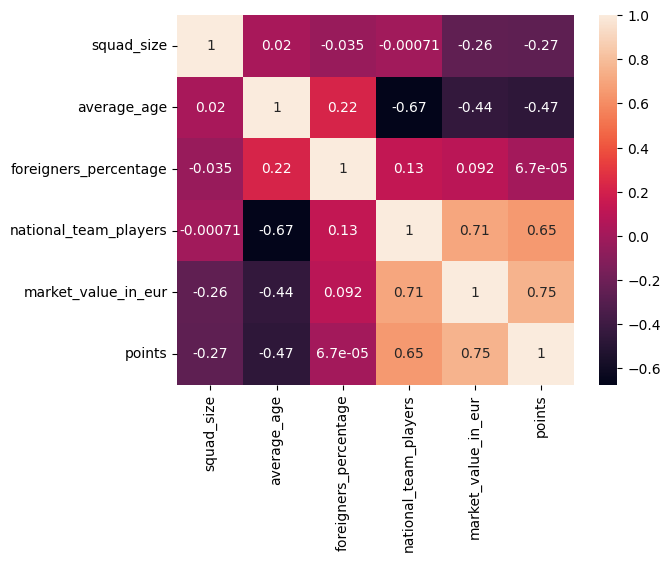

In [29]:
sns.heatmap(data.corr(numeric_only=True),  annot=True)

In [30]:
def desc(lig):
  if lig == "RU1":
    print(f"As can be seen, in {liga} club points depend on Transfer value. \n \n **There're some other interesting facts for {liga}:** \n 1) Club points depend on number of players from national team in the squad. \n 2) The number of players from national team for each team depends on transfer value. \n 3) The number of players from national team for each team depends on the average age of the team (the older is a team, the more national team players)")
  elif lig == "GB1":
    print(f"As can be seen, in {liga} club points depend on Transfer value. \n \n **There're some other interesting facts for {liga}:** \n 1) Club points depend on number of players from national team in the squad. \n 2) The number of players from national team for each team depends on transfer value.")
  elif lig == "IT1":
    print(f"As can be seen, in {liga} club points depend on Transfer value. \n \n **There're some other interesting facts for {liga}:** \n 1) Club points depend on number of players from national team in the squad. \n 2) The number of players from national team for each team depends on transfer value.")
  elif lig == "GR1":
    print(f"As can be seen, in {liga} club points depend on Transfer value. \n \n **There're some other interesting facts for {liga}:** \n 1) Club points depend on number of players from national team in the squad. \n 2) Club points depend on the percentage of foreigners in the club \n 3) The number of players from national team for each team depends on transfer value. \n 4) The bigger the percentage of foreigners, the older is a team  =>  foreigners are usually old \n 5) The bigger the percentage of foreigners, the more expensive the squad is")
  elif lig == 'ES1':
    print(f"As can be seen, in {liga} club points depend on Transfer value. \n \n **There're some other interesting facts for {liga}:** \n 1) Club points depend on number of players from national team in the squad. \n 2) The number of players from national team for each team depends on transfer value.")
  elif lig == 'FR1':
    print(f"As can be seen, in {liga} club points depend on Transfer value. \n \n **There're some other interesting facts for {liga}:** \n 1) Club points depend on number of players from national team in the squad. \n 2) The number of players from national team for each team depends on transfer value.")

In [31]:
desc(liga)

As can be seen, in RU1 club points depend on Transfer value. 
 
 **There're some other interesting facts for RU1:** 
 1) Club points depend on number of players from national team in the squad. 
 2) The number of players from national team for each team depends on transfer value. 
 3) The number of players from national team for each team depends on the average age of the team (the older is a team, the more national team players)
